# Training the competition model

Firstly load all data.

In [2]:
original_json_file_path = "./datasets/competition_final/generated/final_year_1_to_10_data.json"
year_11_json_file_path = "./datasets/competition_final/generated/final_year_11_data.json"

In [3]:
import pandas as pd

original_json_file_path = "./datasets/competition_final/generated/final_year_1_to_10_data.json"
year_11_json_file_path = "./datasets/competition_final/generated/final_year_11_data.json"

df_original = pd.read_json(original_json_file_path)
df_year_11 = pd.read_json(year_11_json_file_path)

df_year_11.head(20)

,tmID,year,playoff,averageWinRate,averagePoints,averageRebounds,averageAssists,averageSteals,averageBlocks,averageTurnovers,averageFGRatio,averageFTRatio,averageThreeRatio,coachWinRate,numberOfAwardedPlayers
0,WAS,11,NaN,0.470588,244.629371,122.927739,47.384615,29.587413,12.310023,50.428904,0.418658,0.749509,0.280573,0.500000,2
1,TUL,11,NaN,0.500000,196.262500,87.358333,39.875000,19.675000,8.566667,38.229167,0.414552,0.780216,0.327587,0.500000,10
2,SEA,11,NaN,0.588235,274.577622,106.679720,55.923077,26.044755,11.078322,49.041958,0.412312,0.802031,0.310246,0.588235,8
3,SAS,11,NaN,0.441176,318.134545,111.044848,67.100000,34.910909,14.202424,50.506061,0.428546,0.808280,0.340362,0.441176,2
4,PHO,11,NaN,0.676471,259.051748,113.709557,49.538462,21.234965,13.693240,47.233100,0.444417,0.801936,0.335072,0.676471,6
5,NYL,11,NaN,0.382353,239.084416,93.432900,46.714286,19.831169,8.073593,40.969697,0.396254,0.808497,0.311745,0.428571,2
6,MIN,11,NaN,0.411765,285.395041,127.131680,61.545455,30.919008,10.638567,50.823691,0.446331,0.781802,0.320708,0.500000,3
7,LAS,11,NaN,0.529412,249.046281,122.257851,66.000000,26.052893,14.456198,54.231405,0.420500,0.807764,0.311575,0.500000,6
8,IND,11,NaN,0.647059,284.894215,111.692011,51.090909,33.229752,16.182369,50.046832,0.409415,0.817711,0.328738,0.647059,6
9,CON,11,NaN,0.470588,239.584848,93.972727,49.500000,22.596970,9.503030,45.674242,0.430382,0.791903,0.286320,0.470588,1


## SVM Evaluation

In [4]:
import pandas as pd

svm_file = pd.read_json("./datasets/generated/svm_hyper_param_tuning.json")

svm_file["diff"] = abs(svm_file["acc_train"] - svm_file["acc_test"])

svm_df = svm_file.sort_values("acc_test", axis=0, ascending=False)

svm_df.head()

,split_year,acc_train,acc_test,best_feature_combination,best_model,best_model_params,diff
3,7,0.625000,0.685185,"['averageWinRate', 'averagePoints', 'averageRe...",SVC(C=10),"{'C': 10, 'break_ties': False, 'cache_size': 2...",0.060185
2,6,0.604651,0.656716,"['averageWinRate', 'averagePoints', 'averageRe...",SVC(C=10),"{'C': 10, 'break_ties': False, 'cache_size': 2...",0.052065
1,5,0.666667,0.625000,"['averageWinRate', 'averagePoints', 'averageRe...","SVC(C=1, kernel='poly')","{'C': 1, 'break_ties': False, 'cache_size': 20...",0.041667
4,8,0.700000,0.550000,"['averageWinRate', 'averagePoints', 'averageRe...","SVC(C=1, kernel='poly')","{'C': 1, 'break_ties': False, 'cache_size': 20...",0.150000
0,4,0.437500,0.276596,"['averageWinRate', 'averagePoints', 'averageRe...","SVC(C=0.1, kernel='sigmoid')","{'C': 0.1, 'break_ties': False, 'cache_size': ...",0.160904


In [25]:
#load libraries
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#load libraries
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pandas as pd
from sklearn.svm import SVC

data_file_path = "./datasets/competition_final/generated/final_year_1_to_10_data.json"
df = pd.read_json(data_file_path)
df.head()

features = ['averageWinRate', 'averagePoints', 'averageRebounds', 'averageAssists', 'averageSteals', 'averageBlocks', 'averageTurnovers', 'averageFGRatio', 'averageFTRatio', 'averageThreeRatio', 'coachWinRate', 'numberOfAwardedPlayers', 'year']

results_df = pd.DataFrame(columns=["year_split", "acc_test", "acc_train", "diff"])

for i in range(5,11):
  #Split dataset in such way that we use latest years for training and older years for testing
  X_train=df[df["year"]<i][features]
  X_test=df[df["year"]>=i][features]
  y_train=df[df["year"]<i]["playoff"]
  y_test=df[df["year"]>=i]["playoff"]

  models = {}

  x = {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}  
  #Logistic Regression
  models['SVM'] = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape="ovr", degree=3, gamma="scale", kernel="rbf", max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

  accuracy, precision, recall = {}, {}, {}

  # Fit the classifier
  models['SVM'].fit(X_train, y_train)

  # Make predictions
  y_pred = models['SVM'].predict(X_test)

  y_pred_test = models['SVM'].predict(X_train)

  temp_df = pd.DataFrame([[i, metrics.accuracy_score(y_test, y_pred), metrics.accuracy_score(y_train, y_pred_test), abs(metrics.accuracy_score(y_test, y_pred) - metrics.accuracy_score(y_train, y_pred_test))]], columns=["year_split", "acc_test", "acc_train", "diff"])
  
  results_df = pd.concat([results_df, temp_df])

results_df.head()

,year_split,acc_test,acc_train,diff
0,5,0.700000,0.630435,0.069565
0,6,0.701493,0.677966,0.023526
0,7,0.666667,0.708333,0.041667
0,8,0.575000,0.686047,0.111047
0,9,0.555556,0.676768,0.121212


Plot SVM model results.

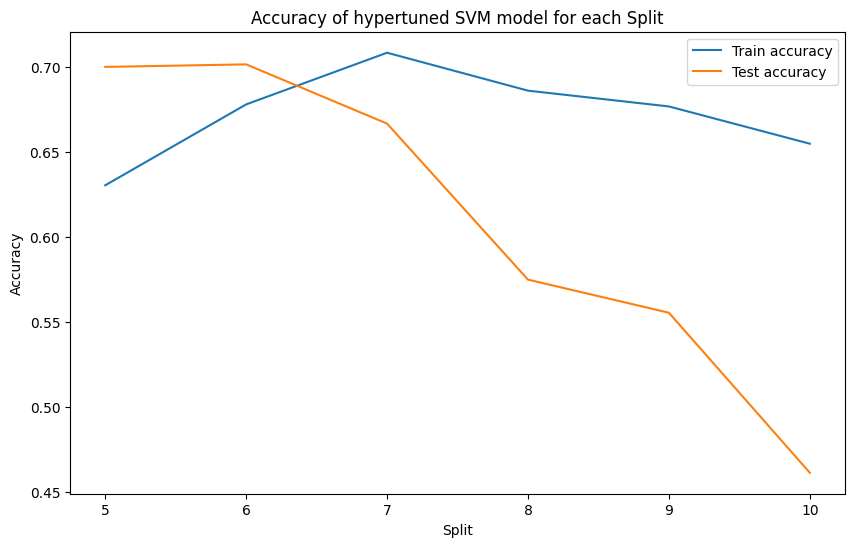

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

df_temp = results_df
df_temp.head()

plt.figure(figsize=(10, 6))
sns.lineplot(x="year_split", y="acc_train", data=df_temp, label="Train accuracy")
sns.lineplot(x="year_split", y="acc_test", data=df_temp, label="Test accuracy")

plt.title('Accuracy of hypertuned SVM model for each Split')
plt.xlabel('Split')
plt.ylabel('Accuracy')
plt.show()

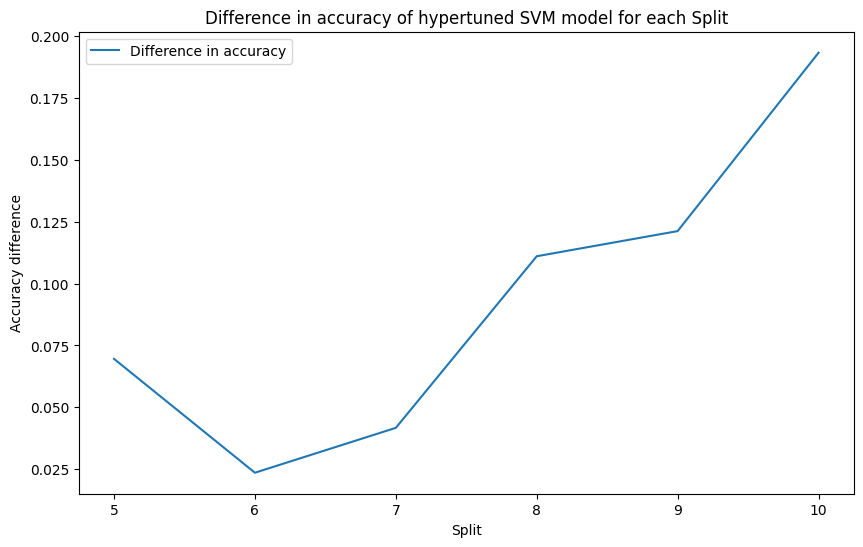

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_temp = results_df
df_temp.head()

plt.figure(figsize=(10, 6))
sns.lineplot(x="year_split", y="diff", data=df_temp, label="Difference in accuracy")

plt.title('Difference in accuracy of hypertuned SVM model for each Split')
plt.xlabel('Split')
plt.ylabel('Accuracy difference')
plt.show()

## KNN Evaluation

In [21]:
import pandas as pd

knn_file = pd.read_json("./datasets/generated/knn_hyper_param_tuning.json")

knn_file["diff"] = abs(knn_file["acc_train"] - knn_file["acc_test"])

knn_df = knn_file[(knn_file["acc_test"] > 0.75) & (knn_file["diff"] < 0.05)].sort_values("acc_test", axis=0, ascending=False)

knn_df.head()


,acc_train,acc_test,best_feature_combination,best_hyperparameters,diff
1248,0.750000,0.759259,"['averageWinRate', 'coachWinRate', 'numberOfAw...","{'n_neighbors': 9, 'weights': 'uniform', 'metr...",0.009259
1249,0.750000,0.759259,"['averageWinRate', 'coachWinRate', 'numberOfAw...","{'n_neighbors': 9, 'weights': 'uniform', 'metr...",0.009259
14273,0.767857,0.759259,"['averagePoints', 'averageRebounds', 'averageB...","{'n_neighbors': 9, 'weights': 'uniform', 'metr...",0.008598
20256,0.767857,0.759259,"['averageWinRate', 'averagePoints', 'averageRe...","{'n_neighbors': 9, 'weights': 'uniform', 'metr...",0.008598
26589,0.767857,0.759259,"['averagePoints', 'averageRebounds', 'averageB...","{'n_neighbors': 9, 'weights': 'uniform', 'metr...",0.008598


Average accuracy:


In [22]:
knn_df["acc_test"].mean()

0.7592592593

## Logreg evaluation

In [22]:
#load libraries
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.linear_model import LogisticRegression
import pandas as pd

data_file_path = "./datasets/competition_final/generated/final_year_1_to_10_data.json"
df = pd.read_json(data_file_path)
df.head()

features = ['averageWinRate', 'averageRebounds', 'averageBlocks', 'averageThreeRatio', 'coachWinRate', 'numberOfAwardedPlayers', 'year']

results_df = pd.DataFrame(columns=["year_split", "acc_test", "acc_train", "diff"])

for i in range(5,11):
  #Split dataset in such way that we use latest years for training and older years for testing
  X_train=df[df["year"]<i][features]
  X_test=df[df["year"]>=i][features]
  y_train=df[df["year"]<i]["playoff"]
  y_test=df[df["year"]>=i]["playoff"]

  models = {}

  #Logistic Regression
  models['Logistic Regression'] = LogisticRegression(C=1, penalty= 'l2', solver='newton-cg', tol=0.001, max_iter=10000)

  accuracy, precision, recall = {}, {}, {}

  # Fit the classifier
  models['Logistic Regression'].fit(X_train, y_train)

  # Make predictions
  y_pred = models['Logistic Regression'].predict(X_test)

  y_pred_test = models['Logistic Regression'].predict(X_train)

  temp_df = pd.DataFrame([[i, metrics.accuracy_score(y_test, y_pred), metrics.accuracy_score(y_train, y_pred_test), abs(metrics.accuracy_score(y_test, y_pred) - metrics.accuracy_score(y_train, y_pred_test))]], columns=["year_split", "acc_test", "acc_train", "diff"])
  
  results_df = pd.concat([results_df, temp_df])

  
results_df.head()


,year_split,acc_test,acc_train,diff
0,5,0.687500,0.673913,0.013587
0,6,0.731343,0.644068,0.087275
0,7,0.759259,0.708333,0.050926
0,8,0.650000,0.744186,0.094186
0,9,0.629630,0.727273,0.097643


Average accuracy:

In [23]:
results_df["acc_test"].mean()

0.6660322851554195

## Conclusion

Logreg is better because it is more consistent.

Best is year 7 split.

After year 8 for some reason in all cases the precision and/or difference in betweeen test and train accuracy.

## Final prediction


In [32]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

y1_10_data_path = "./datasets/competition_final/generated/final_year_1_to_10_data.json"
y11_data_path = "./datasets/competition_final/generated/final_year_11_data.json"

df_y1_10 = pd.read_json(y1_10_data_path)
df_y11 = pd.read_json(y11_data_path)

features = ['averageWinRate', 'averageRebounds', 'averageBlocks', 'averageThreeRatio', 'coachWinRate', 'numberOfAwardedPlayers', 'year']
target = 'playoff'

X_train = df_y1_10[df_y1_10["year"] < 7][features]
X_test = df_y1_10[df_y1_10["year"] >= 7][features]
y_train = df_y1_10[df_y1_10["year"] < 7][target]
y_test = df_y1_10[df_y1_10["year"] >= 7][target]

model = LogisticRegression(C=0.1, penalty= 'l2', solver= 'newton-cg', tol= 0.001, max_iter= 10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train=model.predict(X_train)

pred=model.predict(df_y11[features])

# Step 1: Convert predictions to a DataFrame
pred_df = pd.DataFrame(pred, columns=['label'])

# Step 2: Subset the original DataFrame to get the corresponding 'tmID' values
# for the test set
test_teams = df_y11[df_y11["year"] >= 7][['tmID']].reset_index(drop=True)

# Step 3: Join the DataFrames
result_df = pd.concat([test_teams, pred_df], axis=1)

result_df

,tmID,label
0,WAS,Y
1,TUL,Y
2,SEA,Y
3,SAS,Y
4,PHO,Y
5,NYL,Y
6,MIN,Y
7,LAS,Y
8,IND,Y
9,CON,Y
